In [1]:
from autometrics.dataset.datasets.simplification import SimpDA
from autometrics.util.analysis import display_top_5_metrics_by_validation, get_top_metric_by_validation, plot_metric_target_scatterplot
from autometrics.evaluate.correlation import calculate_correlation
from autometrics.aggregator.regression import Ridge
from autometrics.generator.LLMJudgeProposer import LLMJudgeProposer
from autometrics.metrics.MetricBank import all_metrics
import dspy
import pandas as pd
pd.set_option('display.max_colwidth', None)

import litellm

litellm.suppress_debug_info = True

/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = SimpDA()

In [3]:
dataset.add_metrics(all_metrics)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 41/41 [01:55<00:00,  2.82s/it]


computing greedy matching.


100%|██████████| 68/68 [00:00<00:00, 86.56it/s]


done in 116.51 seconds, 37.25 sentences/sec


In [4]:
train, dev, test = dataset.get_splits(train_ratio=0.2, val_ratio=0.3, seed=42)

In [5]:
llama31_70b = dspy.LM("openai/meta-llama/Meta-Llama-3-70b-Instruct", api_base="http://future-hgx-1:7410/v1", api_key="None")

dspy.settings.configure(lm=llama31_70b)

In [6]:
llama31_70b.model

'openai/meta-llama/Meta-Llama-3-70b-Instruct'

In [7]:
from autometrics.metrics.llm_judge.LLMJudgeOptimized import LLMJudgeOptimized

In [8]:
# fluency_optimized = LLMJudgeOptimized(
#     name="fluency_" + llama31_70b.model.split('/')[-1], 
#     description="fluency", 
#     model=llama31_70b,
#     train_dataset=train,
#     task_description="Given a complicated original sentence, simplify it in a way such that a broader audience could easily understand it.",
#     target_column="fluency",
#     output_prompt_path='simpda_fluency_prompt.dspy',
#     metric_name="fluency",
# )

In [9]:
for target_column in dataset.target_columns:
    new_metric = LLMJudgeOptimized(
        name=target_column + "_" + llama31_70b.model.split('/')[-1], 
        description="Optimized LLM as a judge for " + target_column, 
        model=llama31_70b,
        train_dataset=train,
        task_description="Given a complicated original sentence, simplify it in a way such that a broader audience could easily understand it.",
        target_column=target_column,
        output_prompt_path='simpda_' + target_column + '_prompt.dspy',
        metric_name=target_column,
    )

    train.add_metrics([new_metric])
    dev.add_metrics([new_metric])
    test.add_metrics([new_metric])


RUNNING WITH THE FOLLOWING MEDIUM AUTO RUN SETTINGS:
num_trials: 25
minibatch: True
num_candidates: 19
valset size: 65


==> STEP 1: BOOTSTRAP FEWSHOT EXAMPLES <==
These will be used as few-shot example candidates for our program and for creating instructions.

Bootstrapping N=19 sets of demonstrations...
Bootstrapping set 1/19
Bootstrapping set 2/19
Bootstrapping set 3/19


 47%|████▋     | 8/17 [00:00<00:00, 157.91it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 4/19


 18%|█▊        | 3/17 [00:00<00:00, 189.95it/s]


Bootstrapped 3 full traces after 4 examples in round 0.
Bootstrapping set 5/19


 35%|███▌      | 6/17 [00:00<00:00, 79.54it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 6/19


  6%|▌         | 1/17 [00:00<00:00, 269.83it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 7/19


 47%|████▋     | 8/17 [00:00<00:00, 195.29it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 8/19


 18%|█▊        | 3/17 [00:00<00:00, 173.44it/s]


Bootstrapped 3 full traces after 4 examples in round 0.
Bootstrapping set 9/19


  6%|▌         | 1/17 [00:00<00:00, 247.60it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 10/19


 41%|████      | 7/17 [00:00<00:00, 283.28it/s]


Bootstrapped 7 full traces after 8 examples in round 0.
Bootstrapping set 11/19


  6%|▌         | 1/17 [00:00<00:00, 273.30it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 12/19


  6%|▌         | 1/17 [00:00<00:00, 216.63it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 13/19


 47%|████▋     | 8/17 [00:00<00:00, 253.27it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 14/19


 24%|██▎       | 4/17 [00:00<00:00, 58.66it/s]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 15/19


  6%|▌         | 1/17 [00:00<00:00, 217.68it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 16/19


 18%|█▊        | 3/17 [00:00<00:00, 229.41it/s]


Bootstrapped 3 full traces after 4 examples in round 0.
Bootstrapping set 17/19


  6%|▌         | 1/17 [00:00<00:00, 210.47it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 18/19


  6%|▌         | 1/17 [00:00<00:00, 311.24it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 19/19


 29%|██▉       | 5/17 [00:00<00:00, 192.02it/s]


Bootstrapped 5 full traces after 6 examples in round 0.

==> STEP 2: PROPOSE INSTRUCTION CANDIDATES <==
We will use the few-shot examples from the previous step, a generated dataset summary, a summary of the program code, and a randomly selected prompting tip to propose instructions.

Proposing instructions...

Proposed Instructions for Predictor 0:

0: Given an input text, the task description that the model was trying to follow, and a metric to rate the text on, return a score on this metric.

1: Evaluate the quality of the input text based on the provided task description and metric. Provide a step-by-step reasoning for your evaluation and assign a score within the suggested range. Ensure your score is a numerical value that accurately reflects the text's quality according to the specified metric.

2: Given a complicated original sentence, a simplified version of that sentence, the task description that the model was trying to follow when generating the simplified sentence, and a me

Average Metric: 47.24220689727251 / 65  (72.7): 100%|██████████| 65/65 [00:00<00:00, 375.58it/s]
/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/optuna/_experimental.py:30: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(


Default program score: 72.68

==> STEP 3: FINDING OPTIMAL PROMPT PARAMETERS <==
We will evaluate the program over a series of trials with different combinations of instructions and few-shot examples to find the optimal combination using Bayesian Optimization.

== Minibatch Trial 1 / 25 ==


Average Metric: 15.550755780035914 / 25  (62.2): 100%|██████████| 25/25 [00:00<00:00, 138.06it/s]


Score: 62.2 on minibatch of size 25 with parameters ['Predictor 1: Instruction 12', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [62.2]
Full eval scores so far: [72.68]
Best full score so far: 72.68


== Minibatch Trial 2 / 25 ==


Average Metric: 15.043678963009821 / 25  (60.2): 100%|██████████| 25/25 [00:00<00:00, 235.73it/s]


Score: 60.17 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [62.2, 60.17]
Full eval scores so far: [72.68]
Best full score so far: 72.68


== Minibatch Trial 3 / 25 ==


Average Metric: 15.674345133287103 / 25  (62.7): 100%|██████████| 25/25 [00:00<00:00, 761.52it/s]


Score: 62.7 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [62.2, 60.17, 62.7]
Full eval scores so far: [72.68]
Best full score so far: 72.68


== Minibatch Trial 4 / 25 ==


Average Metric: 14.712725462527947 / 25  (58.9): 100%|██████████| 25/25 [00:00<00:00, 362.22it/s]


Score: 58.85 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [62.2, 60.17, 62.7, 58.85]
Full eval scores so far: [72.68]
Best full score so far: 72.68


== Minibatch Trial 5 / 25 ==


Average Metric: 16.249610306259818 / 25  (65.0): 100%|██████████| 25/25 [00:00<00:00, 675.62it/s]


Score: 65.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 8', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [62.2, 60.17, 62.7, 58.85, 65.0]
Full eval scores so far: [72.68]
Best full score so far: 72.68


== Minibatch Trial 6 / 25 ==


Average Metric: 16.170689724621372 / 25  (64.7): 100%|██████████| 25/25 [00:00<00:00, 214.80it/s]


Score: 64.68 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [62.2, 60.17, 62.7, 58.85, 65.0, 64.68]
Full eval scores so far: [72.68]
Best full score so far: 72.68


== Minibatch Trial 7 / 25 ==


Average Metric: 14.86426462916399 / 25  (59.5): 100%|██████████| 25/25 [00:00<00:00, 491.80it/s] 


Score: 59.46 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 12'].
Minibatch scores so far: [62.2, 60.17, 62.7, 58.85, 65.0, 64.68, 59.46]
Full eval scores so far: [72.68]
Best full score so far: 72.68


== Minibatch Trial 8 / 25 ==


Average Metric: 15.561079852609236 / 25  (62.2): 100%|██████████| 25/25 [00:00<00:00, 535.49it/s]


Score: 62.24 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [62.2, 60.17, 62.7, 58.85, 65.0, 64.68, 59.46, 62.24]
Full eval scores so far: [72.68]
Best full score so far: 72.68


== Minibatch Trial 9 / 25 ==


Average Metric: 16.839800515496687 / 25  (67.4): 100%|██████████| 25/25 [00:00<00:00, 202.11it/s]


Score: 67.36 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [62.2, 60.17, 62.7, 58.85, 65.0, 64.68, 59.46, 62.24, 67.36]
Full eval scores so far: [72.68]
Best full score so far: 72.68


== Minibatch Trial 10 / 25 ==


Average Metric: 16.18952130904783 / 25  (64.8): 100%|██████████| 25/25 [00:00<00:00, 331.35it/s] 


Score: 64.76 on minibatch of size 25 with parameters ['Predictor 1: Instruction 14', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [62.2, 60.17, 62.7, 58.85, 65.0, 64.68, 59.46, 62.24, 67.36, 64.76]
Full eval scores so far: [72.68]
Best full score so far: 72.68


===== Full Eval 1 =====
Doing full eval on next top averaging program (Avg Score: 67.36) from minibatch trials...


Average Metric: 42.33968155579428 / 65  (65.1): 100%|██████████| 65/65 [00:00<00:00, 2141.13it/s] 


Full eval scores so far: [72.68, 65.14]
Best full score so far: 72.68


== Minibatch Trial 11 / 25 ==


Average Metric: 16.141669685805745 / 25  (64.6): 100%|██████████| 25/25 [00:00<00:00, 618.29it/s]


Score: 64.57 on minibatch of size 25 with parameters ['Predictor 1: Instruction 2', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [62.2, 60.17, 62.7, 58.85, 65.0, 64.68, 59.46, 62.24, 67.36, 64.76, 64.57]
Full eval scores so far: [72.68, 65.14]
Best full score so far: 72.68


== Minibatch Trial 12 / 25 ==


Average Metric: 14.489270298200642 / 25  (58.0): 100%|██████████| 25/25 [00:00<00:00, 184.14it/s]


Score: 57.96 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 8'].
Minibatch scores so far: [62.2, 60.17, 62.7, 58.85, 65.0, 64.68, 59.46, 62.24, 67.36, 64.76, 64.57, 57.96]
Full eval scores so far: [72.68, 65.14]
Best full score so far: 72.68


== Minibatch Trial 13 / 25 ==


Average Metric: 18.410870402077 / 25  (73.6): 100%|██████████| 25/25 [00:00<00:00, 1877.76it/s]   


Score: 73.64 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [62.2, 60.17, 62.7, 58.85, 65.0, 64.68, 59.46, 62.24, 67.36, 64.76, 64.57, 57.96, 73.64]
Full eval scores so far: [72.68, 65.14]
Best full score so far: 72.68


== Minibatch Trial 14 / 25 ==


Average Metric: 15.399169209991555 / 25  (61.6): 100%|██████████| 25/25 [00:00<00:00, 2365.44it/s]


Score: 61.6 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [62.2, 60.17, 62.7, 58.85, 65.0, 64.68, 59.46, 62.24, 67.36, 64.76, 64.57, 57.96, 73.64, 61.6]
Full eval scores so far: [72.68, 65.14]
Best full score so far: 72.68


== Minibatch Trial 15 / 25 ==


Average Metric: 16.06489696284039 / 25  (64.3): 100%|██████████| 25/25 [00:00<00:00, 464.02it/s] 


Score: 64.26 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 15'].
Minibatch scores so far: [62.2, 60.17, 62.7, 58.85, 65.0, 64.68, 59.46, 62.24, 67.36, 64.76, 64.57, 57.96, 73.64, 61.6, 64.26]
Full eval scores so far: [72.68, 65.14]
Best full score so far: 72.68


== Minibatch Trial 16 / 25 ==


Average Metric: 16.41650577451762 / 25  (65.7): 100%|██████████| 25/25 [00:00<00:00, 617.26it/s] 


Score: 65.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 6', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [62.2, 60.17, 62.7, 58.85, 65.0, 64.68, 59.46, 62.24, 67.36, 64.76, 64.57, 57.96, 73.64, 61.6, 64.26, 65.67]
Full eval scores so far: [72.68, 65.14]
Best full score so far: 72.68


== Minibatch Trial 17 / 25 ==


Average Metric: 14.57678469489864 / 25  (58.3): 100%|██████████| 25/25 [00:00<00:00, 186.88it/s]


Score: 58.31 on minibatch of size 25 with parameters ['Predictor 1: Instruction 13', 'Predictor 1: Few-Shot Set 10'].
Minibatch scores so far: [62.2, 60.17, 62.7, 58.85, 65.0, 64.68, 59.46, 62.24, 67.36, 64.76, 64.57, 57.96, 73.64, 61.6, 64.26, 65.67, 58.31]
Full eval scores so far: [72.68, 65.14]
Best full score so far: 72.68


== Minibatch Trial 18 / 25 ==


Average Metric: 15.912515582944655 / 25  (63.7): 100%|██████████| 25/25 [00:00<00:00, 386.64it/s]


Score: 63.65 on minibatch of size 25 with parameters ['Predictor 1: Instruction 1', 'Predictor 1: Few-Shot Set 6'].
Minibatch scores so far: [62.2, 60.17, 62.7, 58.85, 65.0, 64.68, 59.46, 62.24, 67.36, 64.76, 64.57, 57.96, 73.64, 61.6, 64.26, 65.67, 58.31, 63.65]
Full eval scores so far: [72.68, 65.14]
Best full score so far: 72.68


== Minibatch Trial 19 / 25 ==


Average Metric: 17.24704031044747 / 25  (69.0): 100%|██████████| 25/25 [00:00<00:00, 571.38it/s] 


Score: 68.99 on minibatch of size 25 with parameters ['Predictor 1: Instruction 18', 'Predictor 1: Few-Shot Set 3'].
Minibatch scores so far: [62.2, 60.17, 62.7, 58.85, 65.0, 64.68, 59.46, 62.24, 67.36, 64.76, 64.57, 57.96, 73.64, 61.6, 64.26, 65.67, 58.31, 63.65, 68.99]
Full eval scores so far: [72.68, 65.14]
Best full score so far: 72.68


== Minibatch Trial 20 / 25 ==


Average Metric: 14.469666505548112 / 25  (57.9): 100%|██████████| 25/25 [00:00<00:00, 296.70it/s]


Score: 57.88 on minibatch of size 25 with parameters ['Predictor 1: Instruction 18', 'Predictor 1: Few-Shot Set 12'].
Minibatch scores so far: [62.2, 60.17, 62.7, 58.85, 65.0, 64.68, 59.46, 62.24, 67.36, 64.76, 64.57, 57.96, 73.64, 61.6, 64.26, 65.67, 58.31, 63.65, 68.99, 57.88]
Full eval scores so far: [72.68, 65.14]
Best full score so far: 72.68


===== Full Eval 2 =====
Doing full eval on next top averaging program (Avg Score: 68.99) from minibatch trials...


Average Metric: 43.95343707696962 / 65  (67.6): 100%|██████████| 65/65 [00:00<00:00, 328.53it/s]


Full eval scores so far: [72.68, 65.14, 67.62]
Best full score so far: 72.68


== Minibatch Trial 21 / 25 ==


Average Metric: 18.323597449722026 / 25  (73.3): 100%|██████████| 25/25 [00:00<00:00, 244.19it/s]


Score: 73.29 on minibatch of size 25 with parameters ['Predictor 1: Instruction 3', 'Predictor 1: Few-Shot Set 3'].
Minibatch scores so far: [62.2, 60.17, 62.7, 58.85, 65.0, 64.68, 59.46, 62.24, 67.36, 64.76, 64.57, 57.96, 73.64, 61.6, 64.26, 65.67, 58.31, 63.65, 68.99, 57.88, 73.29]
Full eval scores so far: [72.68, 65.14, 67.62]
Best full score so far: 72.68


== Minibatch Trial 22 / 25 ==


Average Metric: 17.201076935463394 / 25  (68.8): 100%|██████████| 25/25 [00:00<00:00, 4156.07it/s]


Score: 68.8 on minibatch of size 25 with parameters ['Predictor 1: Instruction 18', 'Predictor 1: Few-Shot Set 3'].
Minibatch scores so far: [62.2, 60.17, 62.7, 58.85, 65.0, 64.68, 59.46, 62.24, 67.36, 64.76, 64.57, 57.96, 73.64, 61.6, 64.26, 65.67, 58.31, 63.65, 68.99, 57.88, 73.29, 68.8]
Full eval scores so far: [72.68, 65.14, 67.62]
Best full score so far: 72.68


== Minibatch Trial 23 / 25 ==


Average Metric: 14.33275356915822 / 25  (57.3): 100%|██████████| 25/25 [00:00<00:00, 1767.39it/s] 


Score: 57.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 3', 'Predictor 1: Few-Shot Set 16'].
Minibatch scores so far: [62.2, 60.17, 62.7, 58.85, 65.0, 64.68, 59.46, 62.24, 67.36, 64.76, 64.57, 57.96, 73.64, 61.6, 64.26, 65.67, 58.31, 63.65, 68.99, 57.88, 73.29, 68.8, 57.33]
Full eval scores so far: [72.68, 65.14, 67.62]
Best full score so far: 72.68


== Minibatch Trial 24 / 25 ==


Average Metric: 15.060239481702208 / 25  (60.2): 100%|██████████| 25/25 [00:00<00:00, 534.77it/s]


Score: 60.24 on minibatch of size 25 with parameters ['Predictor 1: Instruction 9', 'Predictor 1: Few-Shot Set 3'].
Minibatch scores so far: [62.2, 60.17, 62.7, 58.85, 65.0, 64.68, 59.46, 62.24, 67.36, 64.76, 64.57, 57.96, 73.64, 61.6, 64.26, 65.67, 58.31, 63.65, 68.99, 57.88, 73.29, 68.8, 57.33, 60.24]
Full eval scores so far: [72.68, 65.14, 67.62]
Best full score so far: 72.68


== Minibatch Trial 25 / 25 ==


Average Metric: 13.613062491145744 / 25  (54.5): 100%|██████████| 25/25 [00:00<00:00, 173.77it/s]


Score: 54.45 on minibatch of size 25 with parameters ['Predictor 1: Instruction 3', 'Predictor 1: Few-Shot Set 9'].
Minibatch scores so far: [62.2, 60.17, 62.7, 58.85, 65.0, 64.68, 59.46, 62.24, 67.36, 64.76, 64.57, 57.96, 73.64, 61.6, 64.26, 65.67, 58.31, 63.65, 68.99, 57.88, 73.29, 68.8, 57.33, 60.24, 54.45]
Full eval scores so far: [72.68, 65.14, 67.62]
Best full score so far: 72.68


===== Full Eval 3 =====
Doing full eval on next top averaging program (Avg Score: 73.29) from minibatch trials...


Average Metric: 43.345672423466446 / 65  (66.7): 100%|██████████| 65/65 [00:00<00:00, 509.68it/s]


Full eval scores so far: [72.68, 65.14, 67.62, 66.69]
Best full score so far: 72.68


Returning best identified program with score 72.68!


Grading rows:   0%|          | 0/82 [00:00<?, ?row/s]/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeOptimized.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[index, metric_name] = score
Grading rows:   0%|          | 0/153 [00:00<?, ?row/s]/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeOptimized.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[index, metric_name] = score
G


RUNNING WITH THE FOLLOWING MEDIUM AUTO RUN SETTINGS:
num_trials: 25
minibatch: True
num_candidates: 19
valset size: 65


==> STEP 1: BOOTSTRAP FEWSHOT EXAMPLES <==
These will be used as few-shot example candidates for our program and for creating instructions.

Bootstrapping N=19 sets of demonstrations...
Bootstrapping set 1/19
Bootstrapping set 2/19
Bootstrapping set 3/19


 47%|████▋     | 8/17 [00:00<00:00, 291.65it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 4/19


 18%|█▊        | 3/17 [00:00<00:00, 309.60it/s]


Bootstrapped 3 full traces after 4 examples in round 0.
Bootstrapping set 5/19


 35%|███▌      | 6/17 [00:00<00:00, 76.14it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 6/19


  6%|▌         | 1/17 [00:00<00:00, 192.27it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 7/19


 47%|████▋     | 8/17 [00:00<00:00, 240.09it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 8/19


 18%|█▊        | 3/17 [00:00<00:00, 285.30it/s]


Bootstrapped 3 full traces after 4 examples in round 0.
Bootstrapping set 9/19


  6%|▌         | 1/17 [00:00<00:00, 156.86it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 10/19


 41%|████      | 7/17 [00:00<00:00, 257.85it/s]


Bootstrapped 7 full traces after 8 examples in round 0.
Bootstrapping set 11/19


  6%|▌         | 1/17 [00:00<00:00, 312.01it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 12/19


  6%|▌         | 1/17 [00:00<00:00, 318.76it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 13/19


 47%|████▋     | 8/17 [00:00<00:00, 259.55it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 14/19


 24%|██▎       | 4/17 [00:00<00:00, 285.26it/s]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 15/19


  6%|▌         | 1/17 [00:00<00:00, 298.65it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 16/19


 18%|█▊        | 3/17 [00:00<00:00, 251.83it/s]


Bootstrapped 3 full traces after 4 examples in round 0.
Bootstrapping set 17/19


  6%|▌         | 1/17 [00:00<00:00, 290.71it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 18/19


  6%|▌         | 1/17 [00:00<00:00, 305.15it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 19/19


 29%|██▉       | 5/17 [00:00<00:00, 222.62it/s]


Bootstrapped 5 full traces after 6 examples in round 0.

==> STEP 2: PROPOSE INSTRUCTION CANDIDATES <==
We will use the few-shot examples from the previous step, a generated dataset summary, a summary of the program code, and a randomly selected prompting tip to propose instructions.

Proposing instructions...

Proposed Instructions for Predictor 0:

0: Given an input text, the task description that the model was trying to follow, and a metric to rate the text on, return a score on this metric.

1: Given a text, a task description that the model was trying to follow when generating the text, and a specific metric to evaluate the text on, such as simplicity, clarity, or coherence, return a score on this metric. Consider multiple valid simplifications for a given sentence and focus on meaning preservation. Provide a step-by-step reasoning for your score and ensure it falls within the suggested range of possible values for the metric.

2: Given an original text and its simplified version,

Average Metric: 46.66055275843847 / 65  (71.8): 100%|██████████| 65/65 [00:00<00:00, 273.37it/s]
/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/optuna/_experimental.py:30: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(


Default program score: 71.79

==> STEP 3: FINDING OPTIMAL PROMPT PARAMETERS <==
We will evaluate the program over a series of trials with different combinations of instructions and few-shot examples to find the optimal combination using Bayesian Optimization.

== Minibatch Trial 1 / 25 ==


Average Metric: 15.906345054844222 / 25  (63.6): 100%|██████████| 25/25 [00:00<00:00, 537.51it/s]


Score: 63.63 on minibatch of size 25 with parameters ['Predictor 1: Instruction 12', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [63.63]
Full eval scores so far: [71.79]
Best full score so far: 71.79


== Minibatch Trial 2 / 25 ==


Average Metric: 15.410750954589934 / 25  (61.6): 100%|██████████| 25/25 [00:00<00:00, 303.28it/s]


Score: 61.64 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [63.63, 61.64]
Full eval scores so far: [71.79]
Best full score so far: 71.79


== Minibatch Trial 3 / 25 ==


Average Metric: 16.63116697933 / 25  (66.5): 100%|██████████| 25/25 [00:00<00:00, 438.87it/s]    


Score: 66.52 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [63.63, 61.64, 66.52]
Full eval scores so far: [71.79]
Best full score so far: 71.79


== Minibatch Trial 4 / 25 ==


Average Metric: 16.12566405772565 / 25  (64.5): 100%|██████████| 25/25 [00:00<00:00, 328.08it/s] 


Score: 64.5 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [63.63, 61.64, 66.52, 64.5]
Full eval scores so far: [71.79]
Best full score so far: 71.79


== Minibatch Trial 5 / 25 ==


Average Metric: 16.9835858784913 / 25  (67.9): 100%|██████████| 25/25 [00:00<00:00, 398.70it/s]  


Score: 67.93 on minibatch of size 25 with parameters ['Predictor 1: Instruction 8', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [63.63, 61.64, 66.52, 64.5, 67.93]
Full eval scores so far: [71.79]
Best full score so far: 71.79


== Minibatch Trial 6 / 25 ==


Average Metric: 17.970975256373602 / 25  (71.9): 100%|██████████| 25/25 [00:00<00:00, 2289.57it/s]


Score: 71.88 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [63.63, 61.64, 66.52, 64.5, 67.93, 71.88]
Full eval scores so far: [71.79]
Best full score so far: 71.79


== Minibatch Trial 7 / 25 ==


Average Metric: 16.02745592133165 / 25  (64.1): 100%|██████████| 25/25 [00:00<00:00, 2657.52it/s] 


Score: 64.11 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 12'].
Minibatch scores so far: [63.63, 61.64, 66.52, 64.5, 67.93, 71.88, 64.11]
Full eval scores so far: [71.79]
Best full score so far: 71.79


== Minibatch Trial 8 / 25 ==


Average Metric: 16.485389548846488 / 25  (65.9): 100%|██████████| 25/25 [00:00<00:00, 236.79it/s]


Score: 65.94 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [63.63, 61.64, 66.52, 64.5, 67.93, 71.88, 64.11, 65.94]
Full eval scores so far: [71.79]
Best full score so far: 71.79


== Minibatch Trial 9 / 25 ==


Average Metric: 18.5485855486182 / 25  (74.2): 100%|██████████| 25/25 [00:00<00:00, 289.93it/s]  


Score: 74.19 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [63.63, 61.64, 66.52, 64.5, 67.93, 71.88, 64.11, 65.94, 74.19]
Full eval scores so far: [71.79]
Best full score so far: 71.79


== Minibatch Trial 10 / 25 ==


Average Metric: 18.19203038753794 / 25  (72.8): 100%|██████████| 25/25 [00:00<00:00, 1918.40it/s] 


Score: 72.77 on minibatch of size 25 with parameters ['Predictor 1: Instruction 14', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [63.63, 61.64, 66.52, 64.5, 67.93, 71.88, 64.11, 65.94, 74.19, 72.77]
Full eval scores so far: [71.79]
Best full score so far: 71.79


===== Full Eval 1 =====
Doing full eval on next top averaging program (Avg Score: 74.19) from minibatch trials...


Average Metric: 46.719347997496975 / 65  (71.9): 100%|██████████| 65/65 [00:00<00:00, 970.83it/s]


New best full eval score! Score: 71.88
Full eval scores so far: [71.79, 71.88]
Best full score so far: 71.88


== Minibatch Trial 11 / 25 ==


Average Metric: 17.86336568988674 / 25  (71.5): 100%|██████████| 25/25 [00:00<00:00, 294.19it/s] 


Score: 71.45 on minibatch of size 25 with parameters ['Predictor 1: Instruction 2', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [63.63, 61.64, 66.52, 64.5, 67.93, 71.88, 64.11, 65.94, 74.19, 72.77, 71.45]
Full eval scores so far: [71.79, 71.88]
Best full score so far: 71.88


== Minibatch Trial 12 / 25 ==


Average Metric: 16.54709283447126 / 25  (66.2): 100%|██████████| 25/25 [00:00<00:00, 3388.52it/s] 


Score: 66.19 on minibatch of size 25 with parameters ['Predictor 1: Instruction 14', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [63.63, 61.64, 66.52, 64.5, 67.93, 71.88, 64.11, 65.94, 74.19, 72.77, 71.45, 66.19]
Full eval scores so far: [71.79, 71.88]
Best full score so far: 71.88


== Minibatch Trial 13 / 25 ==


Average Metric: 15.497222463416728 / 25  (62.0): 100%|██████████| 25/25 [00:00<00:00, 188.78it/s]


Score: 61.99 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 10'].
Minibatch scores so far: [63.63, 61.64, 66.52, 64.5, 67.93, 71.88, 64.11, 65.94, 74.19, 72.77, 71.45, 66.19, 61.99]
Full eval scores so far: [71.79, 71.88]
Best full score so far: 71.88


== Minibatch Trial 14 / 25 ==


Average Metric: 18.220241714652207 / 25  (72.9): 100%|██████████| 25/25 [00:00<00:00, 3877.87it/s]


Score: 72.88 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [63.63, 61.64, 66.52, 64.5, 67.93, 71.88, 64.11, 65.94, 74.19, 72.77, 71.45, 66.19, 61.99, 72.88]
Full eval scores so far: [71.79, 71.88]
Best full score so far: 71.88


== Minibatch Trial 15 / 25 ==


Average Metric: 18.3955034455657 / 25  (73.6): 100%|██████████| 25/25 [00:00<00:00, 1730.81it/s]  


Score: 73.58 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [63.63, 61.64, 66.52, 64.5, 67.93, 71.88, 64.11, 65.94, 74.19, 72.77, 71.45, 66.19, 61.99, 72.88, 73.58]
Full eval scores so far: [71.79, 71.88]
Best full score so far: 71.88


== Minibatch Trial 16 / 25 ==


Average Metric: 17.516563341094432 / 25  (70.1): 100%|██████████| 25/25 [00:00<00:00, 780.16it/s]


Score: 70.07 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 0'].
Minibatch scores so far: [63.63, 61.64, 66.52, 64.5, 67.93, 71.88, 64.11, 65.94, 74.19, 72.77, 71.45, 66.19, 61.99, 72.88, 73.58, 70.07]
Full eval scores so far: [71.79, 71.88]
Best full score so far: 71.88


== Minibatch Trial 17 / 25 ==


Average Metric: 17.629148185826203 / 25  (70.5): 100%|██████████| 25/25 [00:00<00:00, 316.13it/s]


Score: 70.52 on minibatch of size 25 with parameters ['Predictor 1: Instruction 16', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [63.63, 61.64, 66.52, 64.5, 67.93, 71.88, 64.11, 65.94, 74.19, 72.77, 71.45, 66.19, 61.99, 72.88, 73.58, 70.07, 70.52]
Full eval scores so far: [71.79, 71.88]
Best full score so far: 71.88


== Minibatch Trial 18 / 25 ==


Average Metric: 16.71301401317644 / 25  (66.9): 100%|██████████| 25/25 [00:00<00:00, 513.06it/s] 


Score: 66.85 on minibatch of size 25 with parameters ['Predictor 1: Instruction 1', 'Predictor 1: Few-Shot Set 6'].
Minibatch scores so far: [63.63, 61.64, 66.52, 64.5, 67.93, 71.88, 64.11, 65.94, 74.19, 72.77, 71.45, 66.19, 61.99, 72.88, 73.58, 70.07, 70.52, 66.85]
Full eval scores so far: [71.79, 71.88]
Best full score so far: 71.88


== Minibatch Trial 19 / 25 ==


Average Metric: 18.318716158962893 / 25  (73.3): 100%|██████████| 25/25 [00:00<00:00, 2054.58it/s]


Score: 73.27 on minibatch of size 25 with parameters ['Predictor 1: Instruction 18', 'Predictor 1: Few-Shot Set 3'].
Minibatch scores so far: [63.63, 61.64, 66.52, 64.5, 67.93, 71.88, 64.11, 65.94, 74.19, 72.77, 71.45, 66.19, 61.99, 72.88, 73.58, 70.07, 70.52, 66.85, 73.27]
Full eval scores so far: [71.79, 71.88]
Best full score so far: 71.88


== Minibatch Trial 20 / 25 ==


Average Metric: 17.503874086467654 / 25  (70.0): 100%|██████████| 25/25 [00:00<00:00, 351.64it/s]


Score: 70.02 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 8'].
Minibatch scores so far: [63.63, 61.64, 66.52, 64.5, 67.93, 71.88, 64.11, 65.94, 74.19, 72.77, 71.45, 66.19, 61.99, 72.88, 73.58, 70.07, 70.52, 66.85, 73.27, 70.02]
Full eval scores so far: [71.79, 71.88]
Best full score so far: 71.88


===== Full Eval 2 =====
Doing full eval on next top averaging program (Avg Score: 73.27) from minibatch trials...


Average Metric: 44.91710835783372 / 65  (69.1): 100%|██████████| 65/65 [00:00<00:00, 464.45it/s]


Full eval scores so far: [71.79, 71.88, 69.1]
Best full score so far: 71.88


== Minibatch Trial 21 / 25 ==


Average Metric: 17.934854591056236 / 25  (71.7): 100%|██████████| 25/25 [00:00<00:00, 376.38it/s]


Score: 71.74 on minibatch of size 25 with parameters ['Predictor 1: Instruction 9', 'Predictor 1: Few-Shot Set 14'].
Minibatch scores so far: [63.63, 61.64, 66.52, 64.5, 67.93, 71.88, 64.11, 65.94, 74.19, 72.77, 71.45, 66.19, 61.99, 72.88, 73.58, 70.07, 70.52, 66.85, 73.27, 70.02, 71.74]
Full eval scores so far: [71.79, 71.88, 69.1]
Best full score so far: 71.88


== Minibatch Trial 22 / 25 ==


Average Metric: 16.767572778273315 / 25  (67.1): 100%|██████████| 25/25 [00:00<00:00, 3898.34it/s]


Score: 67.07 on minibatch of size 25 with parameters ['Predictor 1: Instruction 18', 'Predictor 1: Few-Shot Set 3'].
Minibatch scores so far: [63.63, 61.64, 66.52, 64.5, 67.93, 71.88, 64.11, 65.94, 74.19, 72.77, 71.45, 66.19, 61.99, 72.88, 73.58, 70.07, 70.52, 66.85, 73.27, 70.02, 71.74, 67.07]
Full eval scores so far: [71.79, 71.88, 69.1]
Best full score so far: 71.88


== Minibatch Trial 23 / 25 ==


Average Metric: 16.475141741040897 / 25  (65.9): 100%|██████████| 25/25 [00:00<00:00, 380.39it/s]


Score: 65.9 on minibatch of size 25 with parameters ['Predictor 1: Instruction 3', 'Predictor 1: Few-Shot Set 15'].
Minibatch scores so far: [63.63, 61.64, 66.52, 64.5, 67.93, 71.88, 64.11, 65.94, 74.19, 72.77, 71.45, 66.19, 61.99, 72.88, 73.58, 70.07, 70.52, 66.85, 73.27, 70.02, 71.74, 67.07, 65.9]
Full eval scores so far: [71.79, 71.88, 69.1]
Best full score so far: 71.88


== Minibatch Trial 24 / 25 ==


Average Metric: 16.41275663493948 / 25  (65.7): 100%|██████████| 25/25 [00:00<00:00, 327.71it/s] 


Score: 65.65 on minibatch of size 25 with parameters ['Predictor 1: Instruction 13', 'Predictor 1: Few-Shot Set 3'].
Minibatch scores so far: [63.63, 61.64, 66.52, 64.5, 67.93, 71.88, 64.11, 65.94, 74.19, 72.77, 71.45, 66.19, 61.99, 72.88, 73.58, 70.07, 70.52, 66.85, 73.27, 70.02, 71.74, 67.07, 65.9, 65.65]
Full eval scores so far: [71.79, 71.88, 69.1]
Best full score so far: 71.88


== Minibatch Trial 25 / 25 ==


Average Metric: 16.52195090987354 / 25  (66.1): 100%|██████████| 25/25 [00:00<00:00, 258.63it/s] 


Score: 66.09 on minibatch of size 25 with parameters ['Predictor 1: Instruction 18', 'Predictor 1: Few-Shot Set 11'].
Minibatch scores so far: [63.63, 61.64, 66.52, 64.5, 67.93, 71.88, 64.11, 65.94, 74.19, 72.77, 71.45, 66.19, 61.99, 72.88, 73.58, 70.07, 70.52, 66.85, 73.27, 70.02, 71.74, 67.07, 65.9, 65.65, 66.09]
Full eval scores so far: [71.79, 71.88, 69.1]
Best full score so far: 71.88


===== Full Eval 3 =====
Doing full eval on next top averaging program (Avg Score: 71.88) from minibatch trials...


Average Metric: 45.78001954285756 / 65  (70.4): 100%|██████████| 65/65 [00:00<00:00, 317.22it/s]


Full eval scores so far: [71.79, 71.88, 69.1, 70.43]
Best full score so far: 71.88


Returning best identified program with score 71.88!


Grading rows:   0%|          | 0/82 [00:00<?, ?row/s]/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeOptimized.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[index, metric_name] = score
Grading rows:   0%|          | 0/153 [00:00<?, ?row/s]/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeOptimized.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[index, metric_name] = score
G


RUNNING WITH THE FOLLOWING MEDIUM AUTO RUN SETTINGS:
num_trials: 25
minibatch: True
num_candidates: 19
valset size: 65


==> STEP 1: BOOTSTRAP FEWSHOT EXAMPLES <==
These will be used as few-shot example candidates for our program and for creating instructions.

Bootstrapping N=19 sets of demonstrations...
Bootstrapping set 1/19
Bootstrapping set 2/19
Bootstrapping set 3/19


 47%|████▋     | 8/17 [00:00<00:00, 99.58it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 4/19


 18%|█▊        | 3/17 [00:00<00:00, 224.84it/s]


Bootstrapped 3 full traces after 4 examples in round 0.
Bootstrapping set 5/19


 35%|███▌      | 6/17 [00:00<00:00, 247.29it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 6/19


  6%|▌         | 1/17 [00:00<00:00, 293.35it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 7/19


 47%|████▋     | 8/17 [00:00<00:00, 248.15it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 8/19


 18%|█▊        | 3/17 [00:00<00:00, 285.44it/s]


Bootstrapped 3 full traces after 4 examples in round 0.
Bootstrapping set 9/19


  6%|▌         | 1/17 [00:00<00:00, 197.20it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 10/19


 41%|████      | 7/17 [00:00<00:00, 274.27it/s]


Bootstrapped 7 full traces after 8 examples in round 0.
Bootstrapping set 11/19


  6%|▌         | 1/17 [00:00<00:00, 265.90it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 12/19


  6%|▌         | 1/17 [00:00<00:00, 304.22it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 13/19


 47%|████▋     | 8/17 [00:00<00:00, 239.63it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 14/19


 24%|██▎       | 4/17 [00:00<00:00, 244.65it/s]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 15/19


  6%|▌         | 1/17 [00:00<00:00, 301.03it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 16/19


 18%|█▊        | 3/17 [00:00<00:00, 199.32it/s]


Bootstrapped 3 full traces after 4 examples in round 0.
Bootstrapping set 17/19


  6%|▌         | 1/17 [00:00<00:00, 18.73it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 18/19


  6%|▌         | 1/17 [00:00<00:00, 251.56it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 19/19


 29%|██▉       | 5/17 [00:00<00:00, 219.89it/s]


Bootstrapped 5 full traces after 6 examples in round 0.

==> STEP 2: PROPOSE INSTRUCTION CANDIDATES <==
We will use the few-shot examples from the previous step, a generated dataset summary, a summary of the program code, and a randomly selected prompting tip to propose instructions.

Proposing instructions...

Proposed Instructions for Predictor 0:

0: Given an input text, the task description that the model was trying to follow, and a metric to rate the text on, return a score on this metric.

1: Given an input text that is supposed to be a simplification of a complex sentence, the task description that the model was trying to follow when it generated the text (e.g. "simplify the sentence while preserving its original meaning"), and a metric to rate the text on (e.g. "simplification quality"), return a score on this metric that reflects how well the text meets the task description. To do this, carefully consider the complexity of the original sentence, the clarity and concision of th

Average Metric: 46.66859394732724 / 65  (71.8): 100%|██████████| 65/65 [00:00<00:00, 271.80it/s]
/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/optuna/_experimental.py:30: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(


Default program score: 71.8

==> STEP 3: FINDING OPTIMAL PROMPT PARAMETERS <==
We will evaluate the program over a series of trials with different combinations of instructions and few-shot examples to find the optimal combination using Bayesian Optimization.

== Minibatch Trial 1 / 25 ==


Average Metric: 16.162806353896286 / 25  (64.7): 100%|██████████| 25/25 [00:00<00:00, 320.96it/s]


Score: 64.65 on minibatch of size 25 with parameters ['Predictor 1: Instruction 12', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [64.65]
Full eval scores so far: [71.8]
Best full score so far: 71.8


== Minibatch Trial 2 / 25 ==


Average Metric: 17.396167492346095 / 25  (69.6): 100%|██████████| 25/25 [00:00<00:00, 299.51it/s]


Score: 69.58 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [64.65, 69.58]
Full eval scores so far: [71.8]
Best full score so far: 71.8


== Minibatch Trial 3 / 25 ==


Average Metric: 16.708196350683387 / 25  (66.8): 100%|██████████| 25/25 [00:00<00:00, 407.70it/s]


Score: 66.83 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [64.65, 69.58, 66.83]
Full eval scores so far: [71.8]
Best full score so far: 71.8


== Minibatch Trial 4 / 25 ==


Average Metric: 15.04363295327196 / 25  (60.2): 100%|██████████| 25/25 [00:00<00:00, 540.18it/s] 


Score: 60.17 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [64.65, 69.58, 66.83, 60.17]
Full eval scores so far: [71.8]
Best full score so far: 71.8


== Minibatch Trial 5 / 25 ==


Average Metric: 19.049637732638626 / 25  (76.2): 100%|██████████| 25/25 [00:00<00:00, 299.30it/s]


Score: 76.2 on minibatch of size 25 with parameters ['Predictor 1: Instruction 8', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [64.65, 69.58, 66.83, 60.17, 76.2]
Full eval scores so far: [71.8]
Best full score so far: 71.8


== Minibatch Trial 6 / 25 ==


Average Metric: 18.777180603608507 / 25  (75.1): 100%|██████████| 25/25 [00:00<00:00, 256.54it/s]


Score: 75.11 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [64.65, 69.58, 66.83, 60.17, 76.2, 75.11]
Full eval scores so far: [71.8]
Best full score so far: 71.8


== Minibatch Trial 7 / 25 ==


Average Metric: 15.69395007870471 / 25  (62.8): 100%|██████████| 25/25 [00:00<00:00, 305.16it/s] 


Score: 62.78 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 12'].
Minibatch scores so far: [64.65, 69.58, 66.83, 60.17, 76.2, 75.11, 62.78]
Full eval scores so far: [71.8]
Best full score so far: 71.8


== Minibatch Trial 8 / 25 ==


Average Metric: 17.02292604506422 / 25  (68.1): 100%|██████████| 25/25 [00:00<00:00, 196.50it/s]


Score: 68.09 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [64.65, 69.58, 66.83, 60.17, 76.2, 75.11, 62.78, 68.09]
Full eval scores so far: [71.8]
Best full score so far: 71.8


== Minibatch Trial 9 / 25 ==


Average Metric: 18.807323399824178 / 25  (75.2): 100%|██████████| 25/25 [00:00<00:00, 336.51it/s]


Score: 75.23 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [64.65, 69.58, 66.83, 60.17, 76.2, 75.11, 62.78, 68.09, 75.23]
Full eval scores so far: [71.8]
Best full score so far: 71.8


== Minibatch Trial 10 / 25 ==


Average Metric: 17.519168927017287 / 25  (70.1): 100%|██████████| 25/25 [00:00<00:00, 279.88it/s]


Score: 70.08 on minibatch of size 25 with parameters ['Predictor 1: Instruction 14', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [64.65, 69.58, 66.83, 60.17, 76.2, 75.11, 62.78, 68.09, 75.23, 70.08]
Full eval scores so far: [71.8]
Best full score so far: 71.8


===== Full Eval 1 =====
Doing full eval on next top averaging program (Avg Score: 76.2) from minibatch trials...


Average Metric: 45.43088936191764 / 65  (69.9): 100%|██████████| 65/65 [00:00<00:00, 498.26it/s]


Full eval scores so far: [71.8, 69.89]
Best full score so far: 71.8


== Minibatch Trial 11 / 25 ==


Average Metric: 15.356071308548017 / 25  (61.4): 100%|██████████| 25/25 [00:00<00:00, 191.06it/s]


Score: 61.42 on minibatch of size 25 with parameters ['Predictor 1: Instruction 8', 'Predictor 1: Few-Shot Set 10'].
Minibatch scores so far: [64.65, 69.58, 66.83, 60.17, 76.2, 75.11, 62.78, 68.09, 75.23, 70.08, 61.42]
Full eval scores so far: [71.8, 69.89]
Best full score so far: 71.8


== Minibatch Trial 12 / 25 ==


Average Metric: 18.121085684712945 / 25  (72.5): 100%|██████████| 25/25 [00:00<00:00, 295.45it/s]


Score: 72.48 on minibatch of size 25 with parameters ['Predictor 1: Instruction 0', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [64.65, 69.58, 66.83, 60.17, 76.2, 75.11, 62.78, 68.09, 75.23, 70.08, 61.42, 72.48]
Full eval scores so far: [71.8, 69.89]
Best full score so far: 71.8


== Minibatch Trial 13 / 25 ==


Average Metric: 18.33689928478246 / 25  (73.3): 100%|██████████| 25/25 [00:00<00:00, 409.73it/s] 


Score: 73.35 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [64.65, 69.58, 66.83, 60.17, 76.2, 75.11, 62.78, 68.09, 75.23, 70.08, 61.42, 72.48, 73.35]
Full eval scores so far: [71.8, 69.89]
Best full score so far: 71.8


== Minibatch Trial 14 / 25 ==


Average Metric: 17.56227939658106 / 25  (70.2): 100%|██████████| 25/25 [00:00<00:00, 543.35it/s] 


Score: 70.25 on minibatch of size 25 with parameters ['Predictor 1: Instruction 9', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [64.65, 69.58, 66.83, 60.17, 76.2, 75.11, 62.78, 68.09, 75.23, 70.08, 61.42, 72.48, 73.35, 70.25]
Full eval scores so far: [71.8, 69.89]
Best full score so far: 71.8


== Minibatch Trial 15 / 25 ==


Average Metric: 18.976655002086137 / 25  (75.9): 100%|██████████| 25/25 [00:00<00:00, 203.90it/s]


Score: 75.91 on minibatch of size 25 with parameters ['Predictor 1: Instruction 8', 'Predictor 1: Few-Shot Set 14'].
Minibatch scores so far: [64.65, 69.58, 66.83, 60.17, 76.2, 75.11, 62.78, 68.09, 75.23, 70.08, 61.42, 72.48, 73.35, 70.25, 75.91]
Full eval scores so far: [71.8, 69.89]
Best full score so far: 71.8


== Minibatch Trial 16 / 25 ==


Average Metric: 16.526316837064382 / 25  (66.1): 100%|██████████| 25/25 [00:00<00:00, 3985.92it/s]


Score: 66.11 on minibatch of size 25 with parameters ['Predictor 1: Instruction 8', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [64.65, 69.58, 66.83, 60.17, 76.2, 75.11, 62.78, 68.09, 75.23, 70.08, 61.42, 72.48, 73.35, 70.25, 75.91, 66.11]
Full eval scores so far: [71.8, 69.89]
Best full score so far: 71.8


== Minibatch Trial 17 / 25 ==


Average Metric: 17.26078459046924 / 25  (69.0): 100%|██████████| 25/25 [00:00<00:00, 269.12it/s] 


Score: 69.04 on minibatch of size 25 with parameters ['Predictor 1: Instruction 8', 'Predictor 1: Few-Shot Set 17'].
Minibatch scores so far: [64.65, 69.58, 66.83, 60.17, 76.2, 75.11, 62.78, 68.09, 75.23, 70.08, 61.42, 72.48, 73.35, 70.25, 75.91, 66.11, 69.04]
Full eval scores so far: [71.8, 69.89]
Best full score so far: 71.8


== Minibatch Trial 18 / 25 ==


Average Metric: 19.221422331282092 / 25  (76.9): 100%|██████████| 25/25 [00:00<00:00, 494.17it/s]


Score: 76.89 on minibatch of size 25 with parameters ['Predictor 1: Instruction 6', 'Predictor 1: Few-Shot Set 14'].
Minibatch scores so far: [64.65, 69.58, 66.83, 60.17, 76.2, 75.11, 62.78, 68.09, 75.23, 70.08, 61.42, 72.48, 73.35, 70.25, 75.91, 66.11, 69.04, 76.89]
Full eval scores so far: [71.8, 69.89]
Best full score so far: 71.8


== Minibatch Trial 19 / 25 ==


Average Metric: 17.769615534943792 / 25  (71.1): 100%|██████████| 25/25 [00:00<00:00, 3961.38it/s]


Score: 71.08 on minibatch of size 25 with parameters ['Predictor 1: Instruction 13', 'Predictor 1: Few-Shot Set 14'].
Minibatch scores so far: [64.65, 69.58, 66.83, 60.17, 76.2, 75.11, 62.78, 68.09, 75.23, 70.08, 61.42, 72.48, 73.35, 70.25, 75.91, 66.11, 69.04, 76.89, 71.08]
Full eval scores so far: [71.8, 69.89]
Best full score so far: 71.8


== Minibatch Trial 20 / 25 ==


Average Metric: 17.949414704159064 / 25  (71.8): 100%|██████████| 25/25 [00:00<00:00, 3478.56it/s]


Score: 71.8 on minibatch of size 25 with parameters ['Predictor 1: Instruction 6', 'Predictor 1: Few-Shot Set 14'].
Minibatch scores so far: [64.65, 69.58, 66.83, 60.17, 76.2, 75.11, 62.78, 68.09, 75.23, 70.08, 61.42, 72.48, 73.35, 70.25, 75.91, 66.11, 69.04, 76.89, 71.08, 71.8]
Full eval scores so far: [71.8, 69.89]
Best full score so far: 71.8


===== Full Eval 2 =====
Doing full eval on next top averaging program (Avg Score: 75.91) from minibatch trials...


Average Metric: 46.75946802214854 / 65  (71.9): 100%|██████████| 65/65 [00:00<00:00, 481.61it/s]


New best full eval score! Score: 71.94
Full eval scores so far: [71.8, 69.89, 71.94]
Best full score so far: 71.94


== Minibatch Trial 21 / 25 ==


Average Metric: 17.805535814770987 / 25  (71.2): 100%|██████████| 25/25 [00:00<00:00, 288.03it/s]


Score: 71.22 on minibatch of size 25 with parameters ['Predictor 1: Instruction 3', 'Predictor 1: Few-Shot Set 5'].
Minibatch scores so far: [64.65, 69.58, 66.83, 60.17, 76.2, 75.11, 62.78, 68.09, 75.23, 70.08, 61.42, 72.48, 73.35, 70.25, 75.91, 66.11, 69.04, 76.89, 71.08, 71.8, 71.22]
Full eval scores so far: [71.8, 69.89, 71.94]
Best full score so far: 71.94


== Minibatch Trial 22 / 25 ==


Average Metric: 18.62909029474026 / 25  (74.5): 100%|██████████| 25/25 [00:00<00:00, 191.45it/s]


Score: 74.52 on minibatch of size 25 with parameters ['Predictor 1: Instruction 17', 'Predictor 1: Few-Shot Set 14'].
Minibatch scores so far: [64.65, 69.58, 66.83, 60.17, 76.2, 75.11, 62.78, 68.09, 75.23, 70.08, 61.42, 72.48, 73.35, 70.25, 75.91, 66.11, 69.04, 76.89, 71.08, 71.8, 71.22, 74.52]
Full eval scores so far: [71.8, 69.89, 71.94]
Best full score so far: 71.94


== Minibatch Trial 23 / 25 ==


Average Metric: 16.699439654140082 / 25  (66.8): 100%|██████████| 25/25 [00:00<00:00, 479.65it/s]


Score: 66.8 on minibatch of size 25 with parameters ['Predictor 1: Instruction 4', 'Predictor 1: Few-Shot Set 16'].
Minibatch scores so far: [64.65, 69.58, 66.83, 60.17, 76.2, 75.11, 62.78, 68.09, 75.23, 70.08, 61.42, 72.48, 73.35, 70.25, 75.91, 66.11, 69.04, 76.89, 71.08, 71.8, 71.22, 74.52, 66.8]
Full eval scores so far: [71.8, 69.89, 71.94]
Best full score so far: 71.94


== Minibatch Trial 24 / 25 ==


Average Metric: 18.73250234709758 / 25  (74.9): 100%|██████████| 25/25 [00:00<00:00, 4468.30it/s] 


Score: 74.93 on minibatch of size 25 with parameters ['Predictor 1: Instruction 8', 'Predictor 1: Few-Shot Set 14'].
Minibatch scores so far: [64.65, 69.58, 66.83, 60.17, 76.2, 75.11, 62.78, 68.09, 75.23, 70.08, 61.42, 72.48, 73.35, 70.25, 75.91, 66.11, 69.04, 76.89, 71.08, 71.8, 71.22, 74.52, 66.8, 74.93]
Full eval scores so far: [71.8, 69.89, 71.94]
Best full score so far: 71.94


== Minibatch Trial 25 / 25 ==


Average Metric: 15.629249544414769 / 25  (62.5): 100%|██████████| 25/25 [00:00<00:00, 445.42it/s]


Score: 62.52 on minibatch of size 25 with parameters ['Predictor 1: Instruction 6', 'Predictor 1: Few-Shot Set 15'].
Minibatch scores so far: [64.65, 69.58, 66.83, 60.17, 76.2, 75.11, 62.78, 68.09, 75.23, 70.08, 61.42, 72.48, 73.35, 70.25, 75.91, 66.11, 69.04, 76.89, 71.08, 71.8, 71.22, 74.52, 66.8, 74.93, 62.52]
Full eval scores so far: [71.8, 69.89, 71.94]
Best full score so far: 71.94


===== Full Eval 3 =====
Doing full eval on next top averaging program (Avg Score: 75.11) from minibatch trials...


Average Metric: 44.69231598729709 / 65  (68.8): 100%|██████████| 65/65 [00:00<00:00, 297.19it/s]


Full eval scores so far: [71.8, 69.89, 71.94, 68.76]
Best full score so far: 71.94


Returning best identified program with score 71.94!


Grading rows:   0%|          | 0/82 [00:00<?, ?row/s]/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeOptimized.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[index, metric_name] = score
Grading rows:   0%|          | 0/153 [00:00<?, ?row/s]/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeOptimized.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[index, metric_name] = score
G

In [10]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
fluency,fluency_llama70b (0.609026344123519),simplicity_llama70b (0.6135424878608405),BERTScoreP_roberta-large (0.5799887010646303),meaning_llama70b (0.6020378063986075),BERTScoreF_roberta-large (0.5376877382185893)
meaning,meaning_llama70b (0.8726613813710246),fluency_llama70b (0.7297050233888512),BERTScoreF_roberta-large (0.7232674330257098),BERTScoreP_roberta-large (0.6106572417507335),simplicity_llama70b (0.7087089518409224)
simplicity,simplicity_llama70b (0.7797295336744838),fluency_llama70b (0.6480182216154019),BERTScoreP_roberta-large (0.6150344373913592),meaning_llama70b (0.6029373517793398),BERTScoreF_roberta-large (0.5279062401502087)


In [11]:
from tqdm import tqdm
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.ensure_dependencies(train)
    aggregator.ensure_dependencies(dev)
    aggregator.ensure_dependencies(test)

100%|██████████| 3/3 [00:00<00:00, 12.15it/s]


In [12]:
train.get_metric_columns()

['BLEU',
 'CHRF',
 'TER',
 'GLEU',
 'SARI_P',
 'SARI_F',
 'BERTScoreP_roberta-large',
 'BERTScoreR_roberta-large',
 'BERTScoreF_roberta-large',
 'FKGL',
 'fluency_Meta-Llama-3-70b-Instruct',
 'meaning_Meta-Llama-3-70b-Instruct',
 'simplicity_Meta-Llama-3-70b-Instruct']

In [13]:
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.learn(train, target)
    aggregator.predict(train)
    aggregator.predict(dev)
    aggregator.predict(test)

100%|██████████| 3/3 [00:00<00:00, 12.55it/s]


In [14]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
fluency,Rg_simplicity_llm (0.6704710449758643),Rg_fluency_llm (0.6693426749984237),fluency_llama70b (0.609026344123519),simplicity_llama70b (0.6135424878608405),BERTScoreP_roberta-large (0.5799887010646303)
meaning,Rg_meaning_llm (0.8904712124802432),meaning_llama70b (0.8726613813710246),Rg_fluency_llm (0.8282677236698942),Rg_simplicity_llm (0.7892696735723878),fluency_llama70b (0.7297050233888512)
simplicity,Rg_simplicity_llm (0.7853774823951435),Rg_fluency_llm (0.7580864611593953),simplicity_llama70b (0.7797295336744838),fluency_llama70b (0.6480182216154019),Rg_meaning_llm (0.662496316808717)


In [15]:
display_top_5_metrics_by_validation(test, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
fluency,Rg_simplicity_llm (0.6704710449758643),Rg_fluency_llm (0.6693426749984237),Rg_meaning_llm (0.633871352117857),simplicity_llama70b (0.6135424878608405),fluency_llama70b (0.609026344123519)
meaning,Rg_meaning_llm (0.8904712124802432),meaning_llama70b (0.8726613813710246),Rg_fluency_llm (0.8282677236698942),Rg_simplicity_llm (0.7892696735723878),BERTScoreR_roberta-large (0.7413929364907887)
simplicity,Rg_simplicity_llm (0.7853774823951435),simplicity_llama70b (0.7797295336744838),Rg_fluency_llm (0.7580864611593953),Rg_meaning_llm (0.662496316808717),fluency_llama70b (0.6480182216154019)


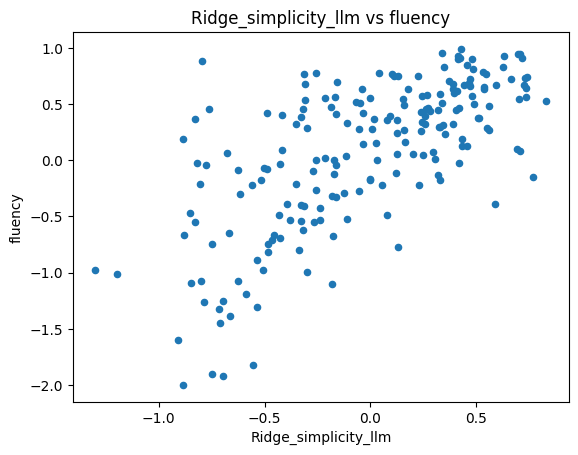

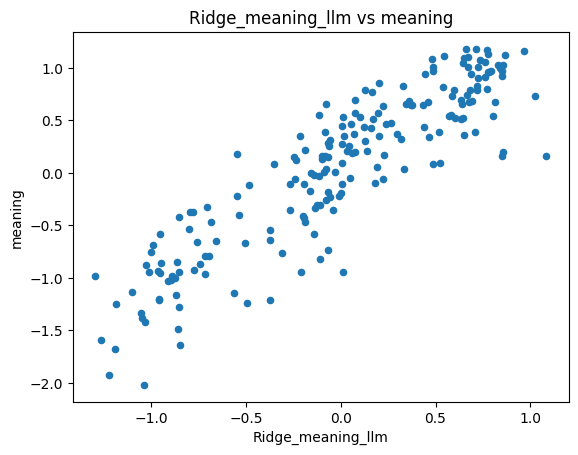

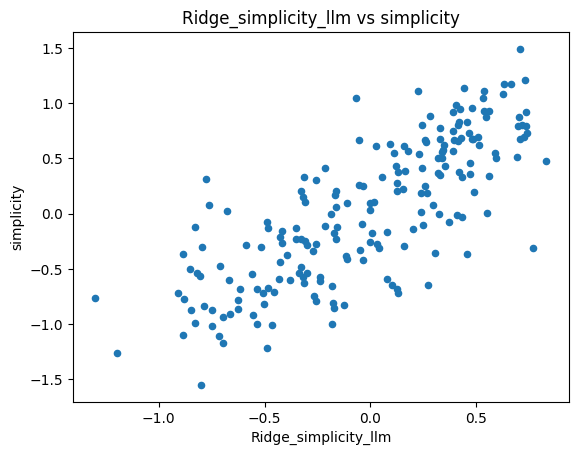

In [16]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation(dev, target_column, True)
    plot_metric_target_scatterplot(test, metric, target_column)
